<a href="https://colab.research.google.com/github/J36A/JSC270_HW2_2022_-JinShang-/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Importing data**

In [4]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# **Initial data exploration**

In [5]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


All data types are the same type as described in the file, adults.name.

In [6]:
income94.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
income94.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
income94.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
for variable in income94.columns:
  print(income94[variable].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [11]:
income94 = income94.replace(' ?', np.nan)

In [12]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

Missing values is ' ?' in this data.


1. age, fnlwgt, eduction, education_num, martial_status, relationship, race, sex, capital_gain, capital_loss, hours_per_week, and gross_income_group have no missing values.
2.   workclass has 1836 missing values.
3. occupation has 1843 missing values.
4. native_country has 583 miassing values.




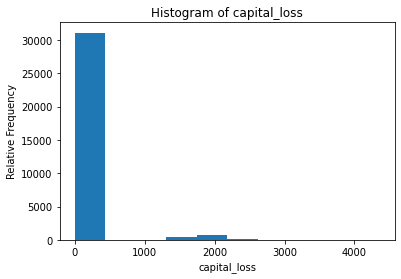

In [14]:
plt.hist(income94.capital_loss, bins = 10)
plt.title('Histogram of capital_loss')
plt.xlabel('capital_loss')
plt.ylabel('Relative Frequency')
plt.show()

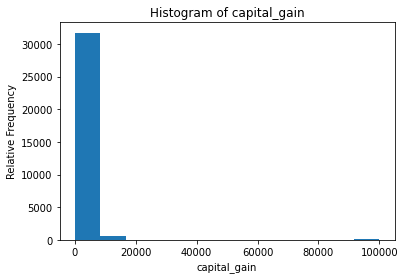

In [15]:
plt.hist(income94.capital_gain, bins = 12)
plt.title('Histogram of capital_gain')
plt.xlabel('capital_gain')
plt.ylabel('Relative Frequency')
plt.show()

I think these two variable can be transformed to categorical variables. Because most of them (over 90%)
are just 0 in these variables and most of the remaining data are also concentrated around a certain value. Only few datas are much higher than others. So I think in most cases, analysts only need to know whether capital_gain and capital_loss are 0. A variable such as "is_capital_gain_zero" might be enough.

In [16]:
income94=income94.assign(is_capital_gain_zero= (lambda x: x==0)(income94.capital_gain))

In [17]:
income94=income94.assign(is_capital_loss_zero= (lambda x: x==0)(income94.capital_loss))

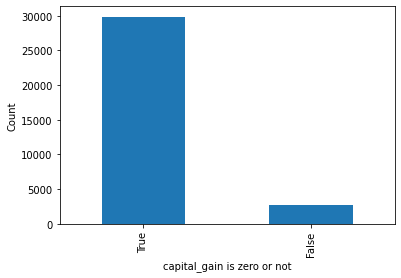

In [18]:
income94.is_capital_gain_zero.value_counts().plot(kind = 'bar')
plt.xlabel('capital_gain is zero or not')
plt.ylabel('Count')
plt.show()

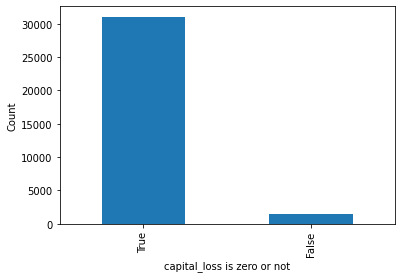

In [19]:
income94.is_capital_loss_zero.value_counts().plot(kind = 'bar')
plt.xlabel('capital_loss is zero or not')
plt.ylabel('Count')
plt.show()

In [20]:
income94.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

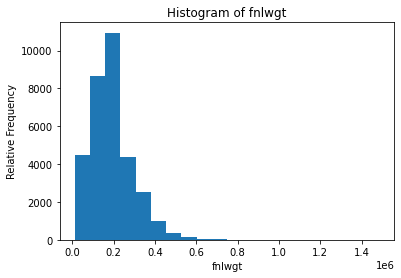

In [21]:
plt.hist(income94.fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

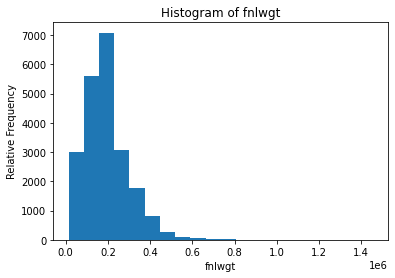

In [22]:
male = income94.loc[income94['sex'] == ' Male']
plt.hist(male.fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

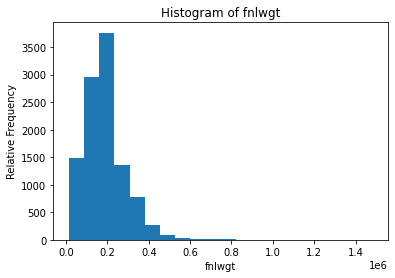

In [23]:
female = income94.loc[income94['sex'] == ' Female']
plt.hist(female.fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

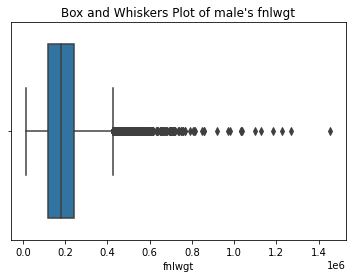

In [24]:
sns.boxplot(x = 'fnlwgt', data = male)
plt.xlabel('fnlwgt')
plt.title('Box and Whiskers Plot of male\'s fnlwgt')
plt.show()

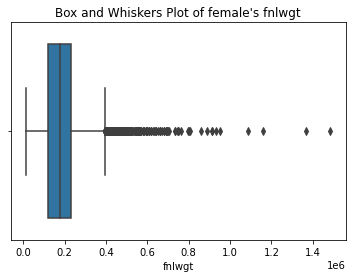

In [25]:
sns.boxplot(x = 'fnlwgt', data = female)
plt.xlabel('fnlwgt')
plt.title('Box and Whiskers Plot of female\'s fnlwgt')
plt.show()

fnlwgt is not symmetrically distributed. It is right skewed. 

The trends between fnlwgt of men and fnlwgt of women are very similar. They all performed right skewed.

I think outliers should not be excluded. Because there are lots of outliers and the distribution of outlier in male's fnlwgt and female's fnlwgt are very similar. So I believe these dates are not recorded incorrectly by accident. So I prefer not to exclud them.

# **Correlation**

In [26]:
income94[['age', 'education_num', 'hours_per_week']].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


Suppose 

$H_0$: There is no linear relationship between education_num and hours_per_week.$$\beta_1=0$$

$H_A$: There is a linear relationship between education_num and hours_per_week.
$$\beta_1\neq0$$ 

In [27]:
reg1 = smf.ols('education_num ~ hours_per_week', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          4.24e-159
Time:                        23:35:13   Log-Likelihood:                -76609.
No. Observations:               32561   AIC:                         1.532e+05
Df Residuals:                   32559   BIC:                         1.532e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8327      0.048    182.


1.   education_num and hours_per_week appear to be correlated, and it does not appear to be correlated between other variable pairs. Because the correlation between education_num and hours_per_week is greater than 0.1 but other pairs are all smaller than 0.1.
2.   Because p-value is very small that indicates that we may reject the null hypothesis of no association between education_num and hours_per_week. To be honest, the direction is not what I expected. I originally thought that the short time of education is related to low wages and thus they must spend more time working to support themselves



Suppose 

$H_0$: There is no linear relationship between education_num and age.$$\beta_1=0$$

$H_A$: There is a linear relationship between education_num and age.
$$\beta_1\neq0$$ 

In [28]:
reg2 = smf.ols('education_num ~ age', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.50
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           4.31e-11
Time:                        23:35:15   Log-Likelihood:                -76949.
No. Observations:               32561   AIC:                         1.539e+05
Df Residuals:                   32559   BIC:                         1.539e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8149      0.043    229.610      0.0



3.   correlation efffcient $r=0.036527$ which is relative small but the hypothesis tests indicate that there are a statistical significant associations between the two variables. This result is not what I expected. I thought there is no relationship between age and education_num especially in this case, all ages are above 30.


In [34]:
df = income94[['education_num', 'hours_per_week']]
covMat = df.cov()
covMat

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995




4.  education_num and hours_per_week tend to show simililar behaviour, which means that they change in same direction. And variance of hours_per_week is very large.



# **Regression**

In [35]:
reg01 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg01.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:50:27   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

$\hat{\beta}_0=36.41$

$\hat{\beta}_1=6.02$

So the regression model between sex and hours_per_week is 
$$y=34.43+6.02x$$, where $x\in\{0,1\}$

so, by this model, male represent $x=1$, so work $36.41+6.02=42.43$ hours per week and female represent $x=0$, so work $36.41$ hours per week.

In [37]:
reg02 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg02.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:02:27   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

$\hat{\beta}_0=29.41$

$\hat{\beta}_1=5.97$

$\hat{\beta}_2=0.6975$

The intercept is the estimated expected hours_per_week at education_num is 0 and sex is female.

The coefficient for education_num is the estimated expected difference in hours_per_week for a one unit increase in education_num, holding sex constant

The coefficient for sex is the estimated expected difference in hours_per_week when sexs change from female to male, holding education_num constant

The hypothesis tests indicate that there are statistically significant associations between the two covariates and the outcome

In [38]:
reg03 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg03.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:15:46   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

$\hat{\beta}_0=31.4218$

$\hat{\beta}_1=5.10$

$\hat{\beta}_2=4.5175$

$\hat{\beta}_3=0.4478$

The intercept is the estimated expected hours_per_week at education_num is 0, gross_income_group is '<50K' and sex is female.

The coefficient for education_num is the estimated expected difference in hours_per_week for a one unit increase in education_num, holding sex and gross_income_group constant

The coefficient for sex is the estimated expected difference in hours_per_week when sexs change from female to male, holding education_num and gross_income_group constant

The coefficient for gross_income_group is the estimated expected difference in hours_per_week when gross_income_group change from '<50K' to '>50K', holding education_num and sex constant

The hypothesis tests indicate that there are statistically significant associations among the three covariates and the outcome

In [39]:
print(reg01.mse_resid) 
print(reg02.mse_resid) 
print(reg03.mse_resid)

144.44672793675824
141.23145178884275
138.09108966554098




1.   Yes, men tend to work more hours in this model
2.   Yes, the trend remain same. The coefficient for education_num is statistically significant. The $95%$ confidence interval for the slope is (0.647, 0.748).
3.   p-value, RSE, RMSE and number of variable can help to decide which model is the best. In this case, I prefer to use the first model. Because although all three model's coeffient has low p-value and similar RSE, the first model just need one variable, sex, which is much simpler than other model. Thus I choose the first model.


# **My Refression Analysis**

In [42]:
myreg1 = smf.ols('hours_per_week ~ occupation', data = income94).fit()
print(myreg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:07:08   Log-Likelihood:            -1.1865e+05
No. Observations:               30718   AIC:                         2.373e+05
Df Residuals:                   30704   BIC:                         2.374e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [44]:
myreg2 = smf.ols('hours_per_week ~ relationship', data = income94).fit()
print(myreg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     692.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:10:33   Log-Likelihood:            -1.2640e+05
No. Observations:               32561   AIC:                         2.528e+05
Df Residuals:                   32555   BIC:                         2.529e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [45]:
myreg3 = smf.ols('hours_per_week ~ occupation + relationship', data = income94).fit()
print(myreg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     283.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:16:30   Log-Likelihood:            -1.1752e+05
No. Observations:               30718   AIC:                         2.351e+05
Df Residuals:                   30699   BIC:                         2.352e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep